In [4]:
!uv pip install openpyxl
!uv pip install matplotlib
!uv pip install kagglehub

Audited 1 package in 8ms
Audited 1 package in 14ms
Resolved 10 packages in 2.08s
Prepared 2 packages in 503ms
Installed 8 packages in 251ms
 + certifi==2025.11.12
 + charset-normalizer==3.4.4
 + idna==3.11
 + kagglehub==0.3.13
 + pyyaml==6.0.3
 + requests==2.32.5
 + tqdm==4.67.1
 + urllib3==2.6.2


In [5]:
import kagglehub
import pandas as pd

# Download latest version
path = kagglehub.dataset_download("muratkokludataset/date-fruit-datasets")

# Note: kagglehub usually downloads to a folder. We need to find the CSV inside.
# Let's find the CSV file path.
import os
print("Path where files are downloaded:", path)
print("Files in that folder:", os.listdir(path))



c:\Users\nawaf\OneDrive\Documents\SDAIA_Week3\week3-machine-learning\.venv\Lib\site-packages\tqdm\auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


100%|██████████| 408k/408k [00:00<00:00, 627kB/s]

Extracting files...
Path where files are downloaded: C:\Users\nawaf\.cache\kagglehub\datasets\muratkokludataset\date-fruit-datasets\versions\1
Files in that folder: ['Date_Fruit_Datasets']


In [6]:
# Check inside the subfolder
subfolder_path = os.path.join(path, "Date_Fruit_Datasets")
print(os.listdir(subfolder_path))

['Date_Fruit_Datasets.arff', 'Date_Fruit_Datasets.xlsx', 'Date_Fruit_Datasets_Citation_Request.txt']


In [7]:
# Define the path to the Excel file found in the subfolder
file_path = os.path.join(subfolder_path, "Date_Fruit_Datasets.xlsx")

# Load it using read_excel
df = pd.read_excel(file_path)

# Inspect the first few rows
df.head()

,AREA,PERIMETER,MAJOR_AXIS,MINOR_AXIS,ECCENTRICITY,EQDIASQ,SOLIDITY,CONVEX_AREA,EXTENT,ASPECT_RATIO,...,KurtosisRR,KurtosisRG,KurtosisRB,EntropyRR,EntropyRG,EntropyRB,ALLdaub4RR,ALLdaub4RG,ALLdaub4RB,Class
0,422163,2378.908,837.8484,645.6693,0.6373,733.1539,0.9947,424428,0.7831,1.2976,...,3.2370,2.9574,4.2287,-59191263232,-50714214400,-39922372608,58.7255,54.9554,47.8400,BERHI
1,338136,2085.144,723.8198,595.2073,0.5690,656.1464,0.9974,339014,0.7795,1.2161,...,2.6228,2.6350,3.1704,-34233065472,-37462601728,-31477794816,50.0259,52.8168,47.8315,BERHI
2,526843,2647.394,940.7379,715.3638,0.6494,819.0222,0.9962,528876,0.7657,1.3150,...,3.7516,3.8611,4.7192,-93948354560,-74738221056,-60311207936,65.4772,59.2860,51.9378,BERHI
3,416063,2351.210,827.9804,645.2988,0.6266,727.8378,0.9948,418255,0.7759,1.2831,...,5.0401,8.6136,8.2618,-32074307584,-32060925952,-29575010304,43.3900,44.1259,41.1882,BERHI
4,347562,2160.354,763.9877,582.8359,0.6465,665.2291,0.9908,350797,0.7569,1.3108,...,2.7016,2.9761,4.4146,-39980974080,-35980042240,-25593278464,52.7743,50.9080,42.6666,BERHI


In [8]:
df.isnull().sum()

AREA             0
PERIMETER        0
MAJOR_AXIS       0
MINOR_AXIS       0
ECCENTRICITY     0
EQDIASQ          0
SOLIDITY         0
CONVEX_AREA      0
EXTENT           0
ASPECT_RATIO     0
ROUNDNESS        0
COMPACTNESS      0
SHAPEFACTOR_1    0
SHAPEFACTOR_2    0
SHAPEFACTOR_3    0
SHAPEFACTOR_4    0
MeanRR           0
MeanRG           0
MeanRB           0
StdDevRR         0
StdDevRG         0
StdDevRB         0
SkewRR           0
SkewRG           0
SkewRB           0
KurtosisRR       0
KurtosisRG       0
KurtosisRB       0
EntropyRR        0
EntropyRG        0
EntropyRB        0
ALLdaub4RR       0
ALLdaub4RG       0
ALLdaub4RB       0
Class            0
dtype: int64

In [9]:
y = df['Class']
X = df.drop('Class', axis = 1)


In [10]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [11]:
X_train.shape

(718, 34)

In [12]:
X_train.info()

<class 'pandas.core.frame.DataFrame'>
Index: 718 entries, 880 to 102
Data columns (total 34 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   AREA           718 non-null    int64  
 1   PERIMETER      718 non-null    float64
 2   MAJOR_AXIS     718 non-null    float64
 3   MINOR_AXIS     718 non-null    float64
 4   ECCENTRICITY   718 non-null    float64
 5   EQDIASQ        718 non-null    float64
 6   SOLIDITY       718 non-null    float64
 7   CONVEX_AREA    718 non-null    int64  
 8   EXTENT         718 non-null    float64
 9   ASPECT_RATIO   718 non-null    float64
 10  ROUNDNESS      718 non-null    float64
 11  COMPACTNESS    718 non-null    float64
 12  SHAPEFACTOR_1  718 non-null    float64
 13  SHAPEFACTOR_2  718 non-null    float64
 14  SHAPEFACTOR_3  718 non-null    float64
 15  SHAPEFACTOR_4  718 non-null    float64
 16  MeanRR         718 non-null    float64
 17  MeanRG         718 non-null    float64
 18  MeanRB       

In [13]:
from sklearn.tree import DecisionTreeClassifier


model = DecisionTreeClassifier()


model.fit(X_train, y_train)

,"criterion criterion: {""gini"", ""entropy"", ""log_loss""}, default=""gini""The function to measure the quality of a split. Supported criteria are""gini"" for the Gini impurity and ""log_loss"" and ""entropy"" both for theShannon information gain, see :ref:`tree_mathematical_formulation`.",'gini'
,"splitter splitter: {""best"", ""random""}, default=""best""The strategy used to choose the split at each node. Supportedstrategies are ""best"" to choose the best split and ""random"" to choosethe best random split.",'best'
,"max_depth max_depth: int, default=NoneThe maximum depth of the tree. If None, then nodes are expanded untilall leaves are pure or until all leaves contain less thanmin_samples_split samples.",None
,"min_samples_split min_samples_split: int or float, default=2The minimum number of samples required to split an internal node:- If int, then consider `min_samples_split` as the minimum number.- If float, then `min_samples_split` is a fraction and `ceil(min_samples_split * n_samples)` are the minimum number of samples for each split... versionchanged:: 0.18 Added float values for fractions.",2
,"min_samples_leaf min_samples_leaf: int or float, default=1The minimum number of samples required to be at a leaf node.A split point at any depth will only be considered if it leaves atleast ``min_samples_leaf`` training samples in each of the left andright branches. This may have the effect of smoothing the model,especially in regression.- If int, then consider `min_samples_leaf` as the minimum number.- If float, then `min_samples_leaf` is a fraction and `ceil(min_samples_leaf * n_samples)` are the minimum number of samples for each node... versionchanged:: 0.18 Added float values for fractions.",1
,"min_weight_fraction_leaf min_weight_fraction_leaf: float, default=0.0The minimum weighted fraction of the sum total of weights (of allthe input samples) required to be at a leaf node. Samples haveequal weight when sample_weight is not provided.",0.0
,"max_features max_features: int, float or {""sqrt"", ""log2""}, default=NoneThe number of features to consider when looking for the best split:- If int, then consider `max_features` features at each split.- If float, then `max_features` is a fraction and `max(1, int(max_features * n_features_in_))` features are considered at each split.- If ""sqrt"", then `max_features=sqrt(n_features)`.- If ""log2"", then `max_features=log2(n_features)`.- If None, then `max_features=n_features`... note:: The search for a split does not stop until at least one valid partition of the node samples is found, even if it requires to effectively inspect more than ``max_features`` features.",None
,"random_state random_state: int, RandomState instance or None, default=NoneControls the randomness of the estimator. The features are alwaysrandomly permuted at each split, even if ``splitter`` is set to``""best""``. When ``max_features < n_features``, the algorithm willselect ``max_features`` at random at each split before finding the bestsplit among them. But the best found split may vary across differentruns, even if ``max_features=n_features``. That is the case, if theimprovement of the criterion is identical for several splits and onesplit has to be selected at random. To obtain a deterministic behaviourduring fitting, ``random_state`` has to be fixed to an integer.See :term:`Glossary ` for details.",None
,"max_leaf_nodes max_leaf_nodes: int, default=NoneGrow a tree with ``max_leaf_nodes`` in best-first fashion.Best nodes are defined as relative reduction in impurity.If None then unlimited number of leaf nodes.",None
,"min_impurity_decrease min_impurity_decrease: float, default=0.0A node will be split if this split induces a decrease of the impuritygreater than or equal to this value.The weighted impurity decrease equation is the following:: N_t / N * (impurity - N_t_R / N_t * right_impurity - N_t_L / N_t * left_impurity)where ``N`` is the total number of samples, ``N_t`` is the number ofsamples at the curre

In [14]:
y_pred = model.predict(X_test)


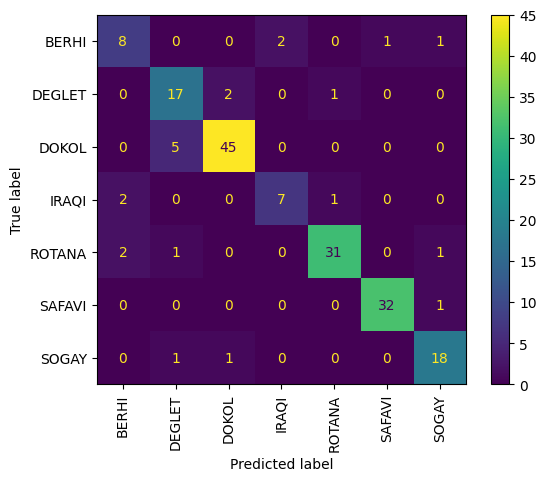

In [15]:
import matplotlib.pyplot as plt
from sklearn.metrics import ConfusionMatrixDisplay

ConfusionMatrixDisplay.from_predictions(y_test, y_pred, xticks_rotation='vertical')
plt.show()

In [17]:
from sklearn.metrics import accuracy_score

score = accuracy_score(y_test, y_pred)
print(f"Model Accuracy: {score:.2%}")

Model Accuracy: 87.78%


In [18]:
import joblib

joblib.dump(model, 'Date-classifier_model.pkl')

['Date-classifier_model.pkl']